# Domain Telecom

## 1. Import and warehouse data

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns # For Data Visualization
import matplotlib.pyplot as plt # Necessary module for plotting purpose
plt.rcParams["patch.force_edgecolor"] = True
%matplotlib inline

import plotly.offline as py#visualization
import plotly.graph_objs as go#visualization

pd.set_option('display.max_columns', None)
import warnings
warnings.filterwarnings("ignore");

In [2]:
# Mounting google drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
# importing data and exploring shape and size

data1 = pd.read_csv('/content/drive/My Drive/Corizo/Class 6/TelcomCustomer-Churn_1.csv')
data2 = pd.read_csv('/content/drive/My Drive/Corizo/Class 6/TelcomCustomer-Churn_2.csv')
print("The shape and size of the first dataset is ",data1.shape,"and",data1.size,"respectively.")
print("The shape and size of the second dataset is ",data2.shape,"and",data2.size,"respectively.")

The shape and size of the first dataset is  (7043, 10) and 70430 respectively.
The shape and size of the second dataset is  (7043, 11) and 77473 respectively.


In [4]:
data1.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No


In [5]:
data1.shape

(7043, 10)

In [6]:
data2.head()

,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [7]:
data2.shape

(7043, 11)

In [8]:
dataset = pd.concat([data1, data2],axis=1)
dataset.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [9]:
print("The final shape and size of the dataset is ",dataset.shape,"and",dataset.size,"respectively.")

The final shape and size of the dataset is  (7043, 21) and 147903 respectively.


## 2. Data Cleansing

In [12]:
# replacing empty places if any to NaN beforehand so that easy to identify empty values
dataset.replace(' ',np.nan,inplace=True)
dataset.isnull().sum().sum()

11

**There are in total 11 NaN/empty values in the dataset.**

In [13]:
dataset.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [14]:
#getting information about the dataset.
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


**Observations:**

**1. There are 3 attributes viz. SeniorCitizen, tenure and MonthlyCharges which are continuous in nature and hence the datatype as int/float, rest others are of object datatype which includes strings.**

**2. Looking at the dataset, it is clear that the attribute TotalCharges is continuous in nature. Its datatype will be changed to float64 as it contains decimal values.**

**3. The attribute TotalCharges has 7032 non-null values compared to 7043 non-null values in other attributes. These correspond to the 11 null values figured earlier. It will be replaced with the median of the dataset.**

**4. The attribute customerID has no significance and can be dropped.**

In [15]:
dataset.drop('customerID',inplace=True,axis=1)

In [16]:
dataset.head(2)

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No


In [17]:
#displaying rows that have TotalCharges attribute's value as NaN

dataset[dataset['TotalCharges'].isna()]

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
488,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,No,Yes,Yes,Yes,No,Two year,Yes,Bank transfer (automatic),52.55,NaN,No
753,Male,0,No,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.25,NaN,No
936,Female,0,Yes,Yes,0,Yes,No,DSL,Yes,Yes,Yes,No,Yes,Yes,Two year,No,Mailed check,80.85,NaN,No
1082,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.75,NaN,No
1340,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,Yes,Yes,Yes,Yes,No,Two year,No,Credit card (automatic),56.05,NaN,No
3331,Male,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,19.85,NaN,No
3826,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.35,NaN,No
4380,Female,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.00,NaN,No
5218,Male,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,One year,Yes,Mailed check,19.70,NaN,No
6670,Female,0,Yes,Yes,0,Yes,Yes,DSL,No,Yes,Yes,Yes,Yes,No,Two year,No,Mailed check,73.35,NaN,No


In [18]:
#changing datatype of the attribute TotalCharges
dataset['TotalCharges'] = pd.to_numeric(dataset['TotalCharges'], errors='coerce')

#missing value treatment
# filling the missing values with the median of the attribute's data
dataset.fillna(dataset['TotalCharges'].median(),inplace=True)

In [19]:
# calling describe method only on the categorical attributes (datatype=object)
dataset.describe(include=['O']).transpose()

,count,unique,top,freq
gender,7043,2,Male,3555
Partner,7043,2,No,3641
Dependents,7043,2,No,4933
PhoneService,7043,2,Yes,6361
MultipleLines,7043,3,No,3390
InternetService,7043,3,Fiber optic,3096
OnlineSecurity,7043,3,No,3498
OnlineBackup,7043,3,No,3088
DeviceProtection,7043,3,No,3095
TechSupport,7043,3,No,3473


**The above mentioned attributes are of categorical nature. It is to be noted that the attribute SeniorCitizen is also categorical as it contains only the values 0 and 1 as described below.**

In [20]:
#showing the value count of the attribute SeniorCitizen
dataset['SeniorCitizen'].value_counts()

SeniorCitizen
0    5901
1    1142
Name: count, dtype: int64

# 3. Data analysis and visualisation

## 3.1 Statistical analysis

In [21]:
dataset.describe(include='all').transpose()

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
gender,7043,2,Male,3555,NaN,NaN,NaN,NaN,NaN,NaN,NaN
SeniorCitizen,7043.0,NaN,NaN,NaN,0.162147,0.368612,0.0,0.0,0.0,0.0,1.0
Partner,7043,2,No,3641,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Dependents,7043,2,No,4933,NaN,NaN,NaN,NaN,NaN,NaN,NaN
tenure,7043.0,NaN,NaN,NaN,32.371149,24.559481,0.0,9.0,29.0,55.0,72.0
PhoneService,7043,2,Yes,6361,NaN,NaN,NaN,NaN,NaN,NaN,NaN
MultipleLines,7043,3,No,3390,NaN,NaN,NaN,NaN,NaN,NaN,NaN
InternetService,7043,3,Fiber optic,3096,NaN,NaN,NaN,NaN,NaN,NaN,NaN
OnlineSecurity,7043,3,No,3498,NaN,NaN,NaN,NaN,NaN,NaN,NaN
OnlineBackup,7043,3,No,3088,NaN,NaN,NaN,NaN,NaN,NaN,NaN


**1. The attributes 'tenure', 'MonthlyCharges' and 'TotalCharges' are continuous in nature, the rest are categorical.**

**2. The attribute 'PaymentMethod' has the most labels (4) among categorical datatypes.**

## 3.2 Analysis of the categorical variables

Here we will analyse the 16 independent categorical variables and the 1 dependent variable namely-

- Churn (dependent)
- gender
- SeniorCitizen
- Partner
- Dependents
- PhoneService
- MultipleLines
- InternetService
- OnlineSecurity
- OnlineBackup
- DeviceProtection
- TechSupport
- StreamingTV
- StreamingMovies
- Contract
- PaperlessBilling
- PaymentMethod

After which we will convert the categorical attributes to continuous

In [22]:
#This function creates a plot with a pie chart on the left and a stack bar chart on the right

def pie_bar(column):

    if column !='Churn':
        fig, ax = plt.subplots(1,2, figsize=(15,5))

        # part 1: pie chart on the left side

        tmp1 = dataset[column].value_counts(normalize=True).mul(100)
        labels = dataset[column].value_counts().index.tolist()

        ax[0].text(0, 1.2,"% of customers by {}".format(column) ,fontsize=12, fontweight='bold', fontfamily='monospace',ha='center')
        ax[0].pie(tmp1.values, labels=labels, autopct='%1.1f%%', shadow=True, startangle=90, textprops=dict(size=14),
                  colors = ["#fad796","#91deff","#cb96fa","#8f98ff"])
        ax[0].axis('equal')

        # part 2: stacked pie chart on the right side

        # creation of a cross table - normalize along rows (churn: yes/no)
        tmp2 = pd.crosstab(index = dataset[column], columns = dataset['Churn'], values = dataset['Churn'],
                                   aggfunc = len,
                                   normalize = 'index').mul(100)

        # print(tmp2)

        labels1 = tmp2.index

        ax[1].bar(labels1, tmp2['No'], width = 0.35, label='No churn', color="#1ed686")
        ax[1].bar(labels1, tmp2['Yes'], width = 0.35, label='Churn', color="#f75931", bottom=tmp2['No'])

        # create annotations
        for p in ax[1].patches:
            width, height = p.get_width(), p.get_height()
            # x, y = p.get_xy()
            ax[1].annotate('{:.2f}%'.format(height), (p.get_x()+.25*width, p.get_y()+.4*height),
                           color = 'black',
                           weight = 'bold',
                           size = 14)

        ax[1].set_ylabel('Percentage')
        ax[1].text(0.5, 110,"Count by churn and {}".format(column) ,fontsize=12, fontweight='bold', fontfamily='monospace',ha='center')
        #ax[1].set_title('Count by churn and {}'.format(column))
        ax[1].legend()

    else:   # plotting for churn variable
        tmp1 = dataset[column].value_counts(normalize=True).mul(100)
        labels = dataset[column].value_counts().index.tolist()

        plt.text(0, 1.2,"% of customers by {}".format(column) ,fontsize=12, fontweight='bold', fontfamily='monospace',ha='center')
        plt.pie(tmp1.values, labels=labels, autopct='%1.1f%%', shadow=True, startangle=90, textprops=dict(size=14),
                  colors = ["#fad796","#91deff","#cb96fa","#8f98ff"])
        plt.axis('equal')


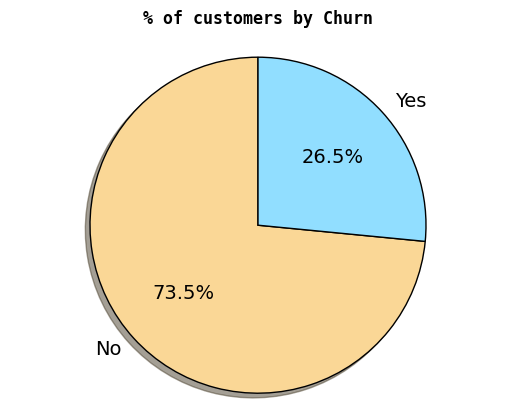

In [23]:
pie_bar('Churn')

**This is the target attribute and in imbalanced with 26.5% of customers Churn while 73.5% do not Churn.**

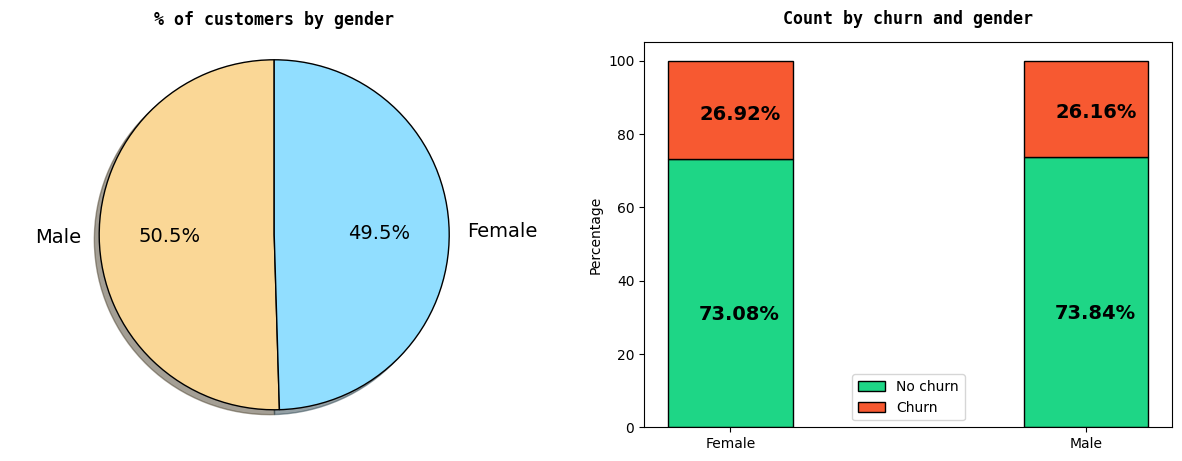

In [24]:
pie_bar("gender")

**Observation:**

**1. The gender attribute is fairly distributed between Male (50.5%) and Female (49.5%).**

**2. An almost equal number of female customers (73.08%) and male customers(73.84%) did retain themselves with the telecom company.**

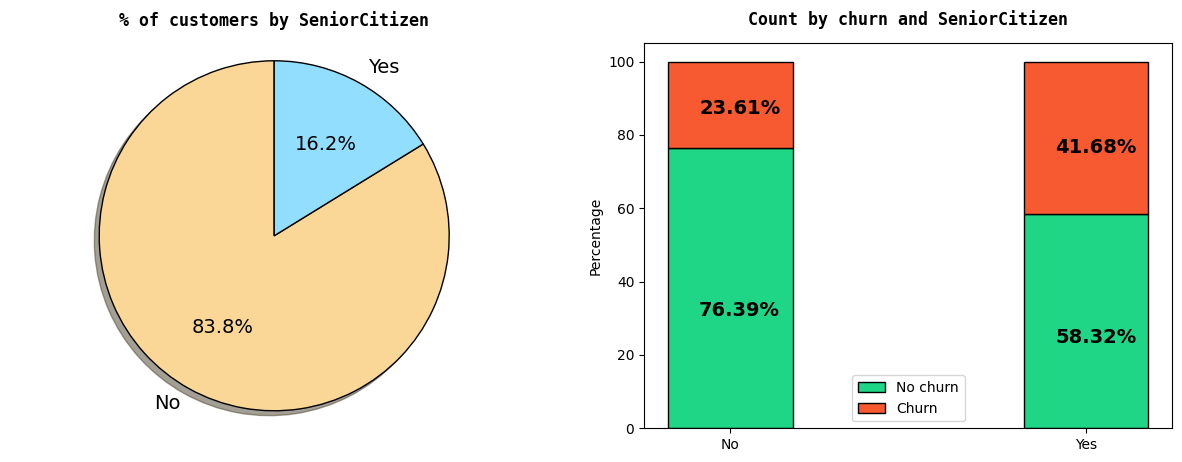

In [25]:
dataset["SeniorCitizen"].replace([0,1],["No","Yes"], inplace=True)
pie_bar("SeniorCitizen")

**Observation:**

**1. A high majority (83.8%) of customers are non-senior. The percentage of senior citizens is 16.2%.**

**2. A higher number of non-senior customers (76.39%) did retain themselves with the telecom company compared to the senior customers (58.32%).**

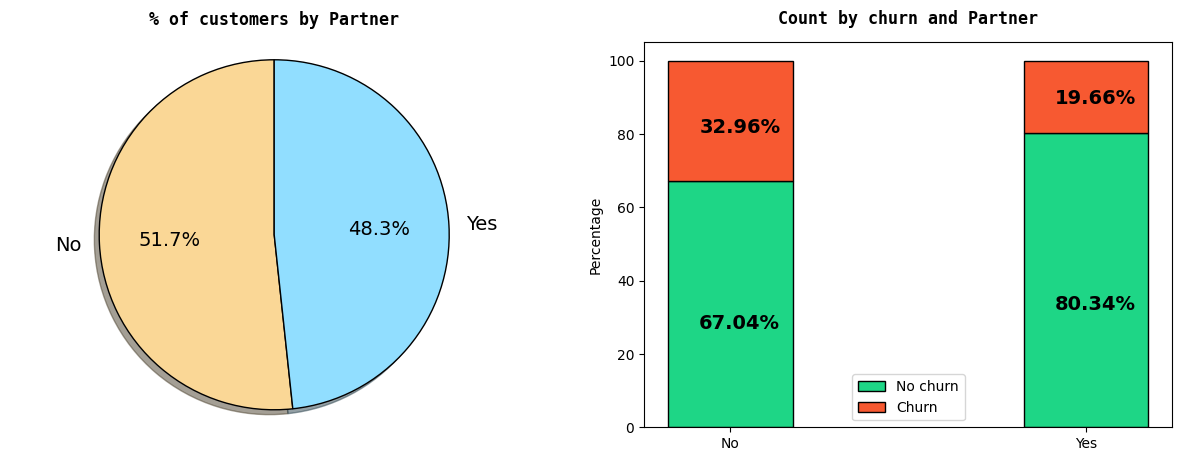

In [26]:
pie_bar("Partner")

**Observation:**

**1. The Partner attribute is fairly distributed between having partners (48.3%) and being single (51.7%).**

**2. A higher number of customers with partners (80.34%) did retain themselves with the telecom company compared to the single customers (67.04%).**

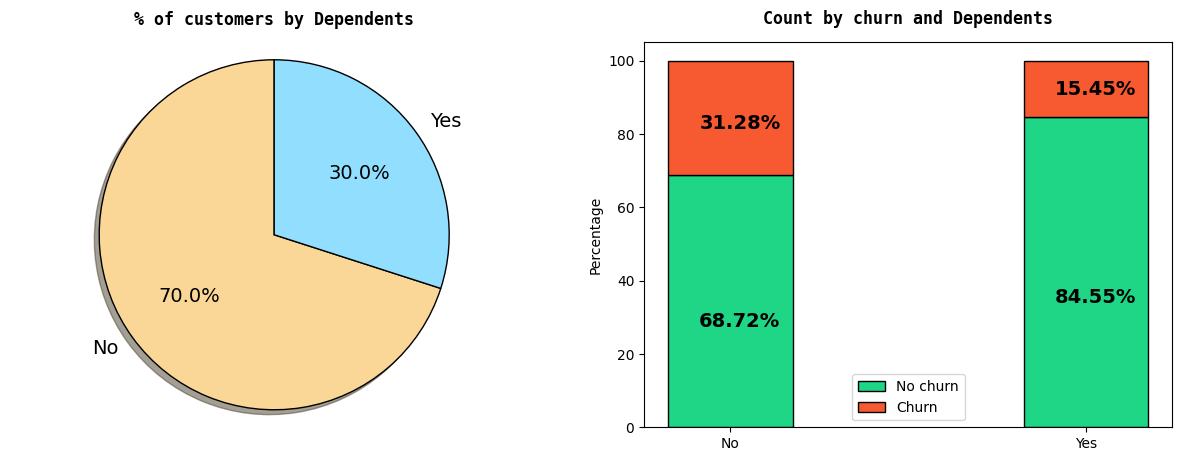

In [27]:
pie_bar("Dependents")

**Observations:**

**1. Majority of customers (70%) do not have Dependents.**

**2. A higher number of customers with dependents (84.55%) did retain themselves with the telecom company than the customers without any dependents (68.72%).**

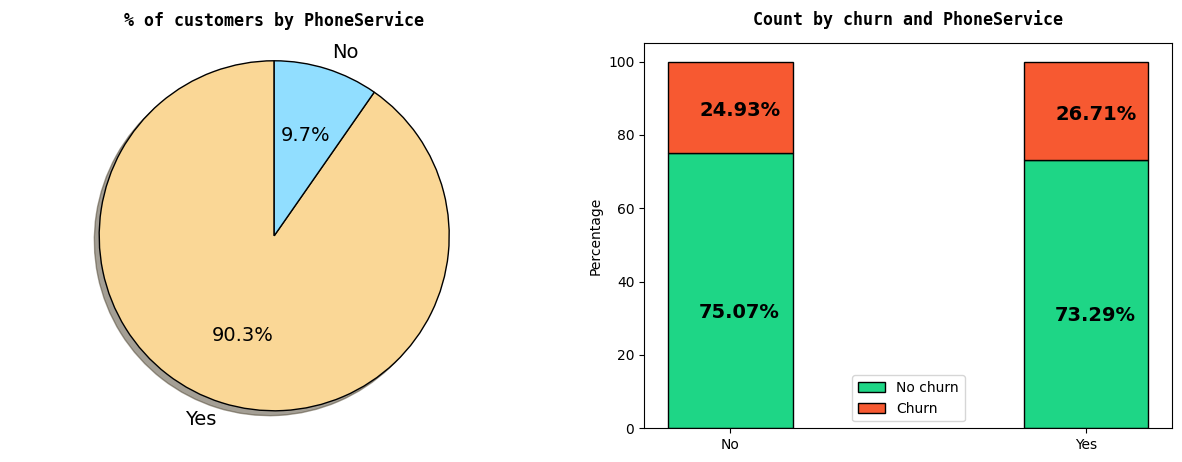

In [28]:
pie_bar("PhoneService")

**Observations:**

**1. Majority of customers (90.3%) have PhoneService.**

**2. An almost equal number of customers with PhoneService(73.29%) and customers without PhoneService(75.07%) did retain themselves with the telecom company.**

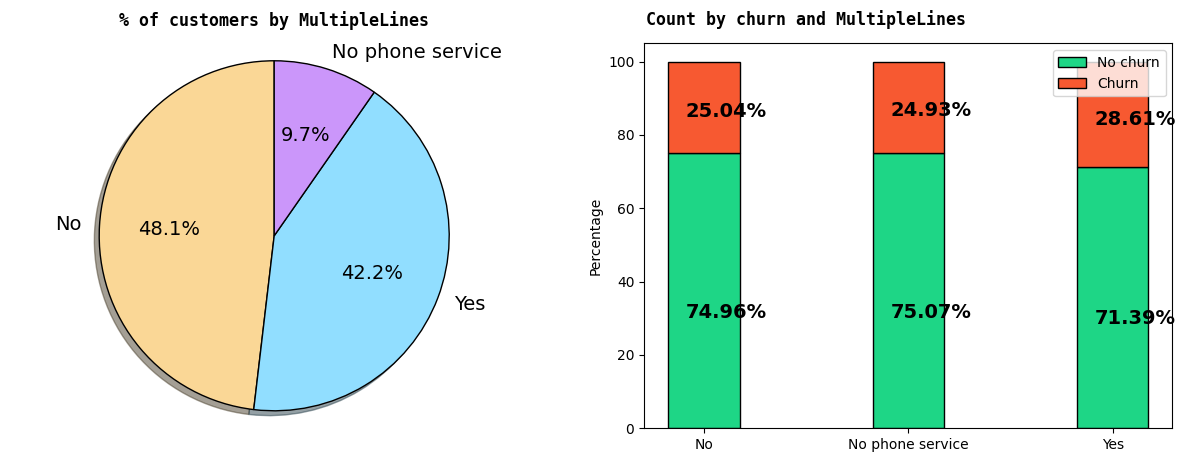

In [29]:
pie_bar("MultipleLines")
dataset['MultipleLines'].replace(to_replace='No phone service', value='No', inplace=True)

**Observations:**

**1. As seen in the previous graph, there are 9.7% customers without PhoneService.**

**2. In the domain of customers with PhoneService, a slightly higher number of customers (48.1% of total) do not have MultipleLines compared to the customers who do (42.2%).**

**3. Irrespective of having MultipleLines or not, the fraction of customers who did retain themselves with the telecom company falls within 71-75%.**

**4. 'No phone service' can be assumed as a subset of 'No' and hence merged together as both mean having No MultipleLines.**

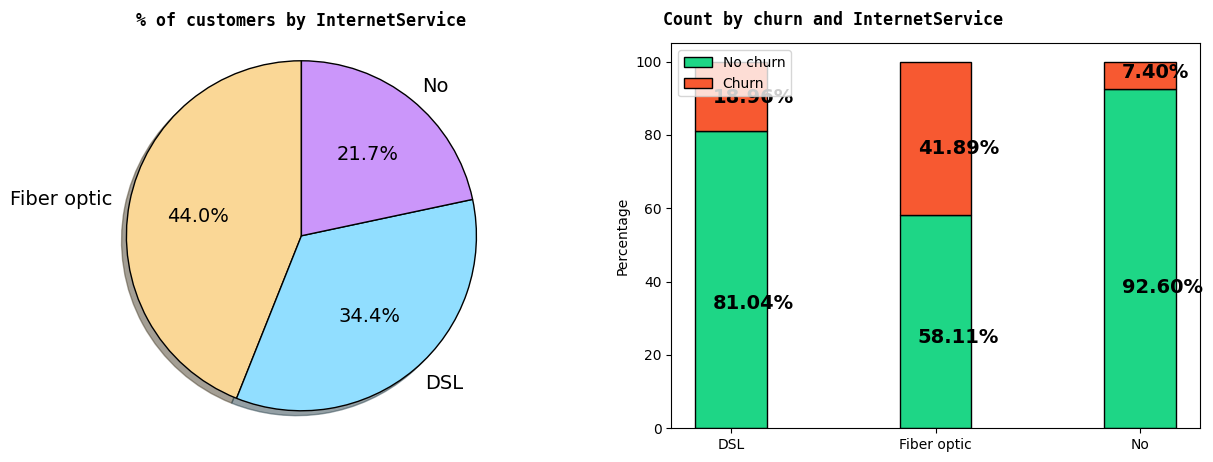

In [30]:
pie_bar("InternetService")

**Observations**

**1. There are 21.7% customers without InternetService. 44% customers having DSL InternetService and 34.4% customers having Fiber optic InternetService. The data is unequally distributed.**

**2. A very high proportion of customers without InternetService (92.60%) did retain themselves with the telecom company compared to customers with Fiber optic InternetService (58.11%) and customers with DSL InternetService (81.04%).**

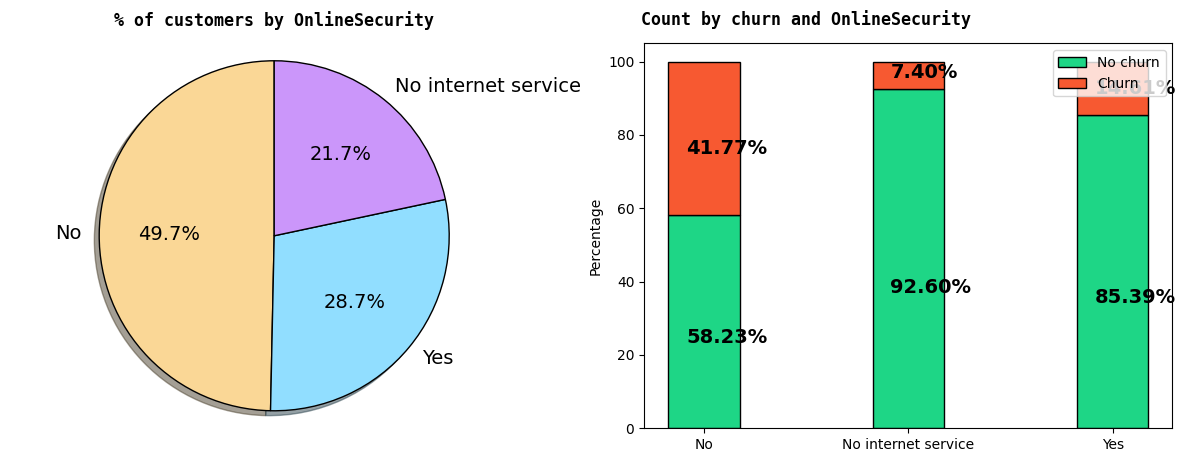

In [31]:
pie_bar("OnlineSecurity")
dataset['OnlineSecurity'].replace(to_replace='No internet service', value='No', inplace=True)

**Observations:**

**1. There are 21.7% customers without InternetService as also figured in previous plot. Almost an half of all the customers did not have OnlineSecurity but had InternetService (49.7%) while 28.7% customers have OnlineSecurity.**

**2. As revealed in previous plot, a very high proportion of customers without InternetService (92.60%) retained themselves with the telecom company compared to a high proportion of customers with OnlineSecurity (85.39%) and a low proportion of customers without OnlineSecurity but with InternetService (58.23%).**

**3. 'No internet service' can be assumed as a subset of 'No' and hence merged together as both mean having No OnlineSecurity.**

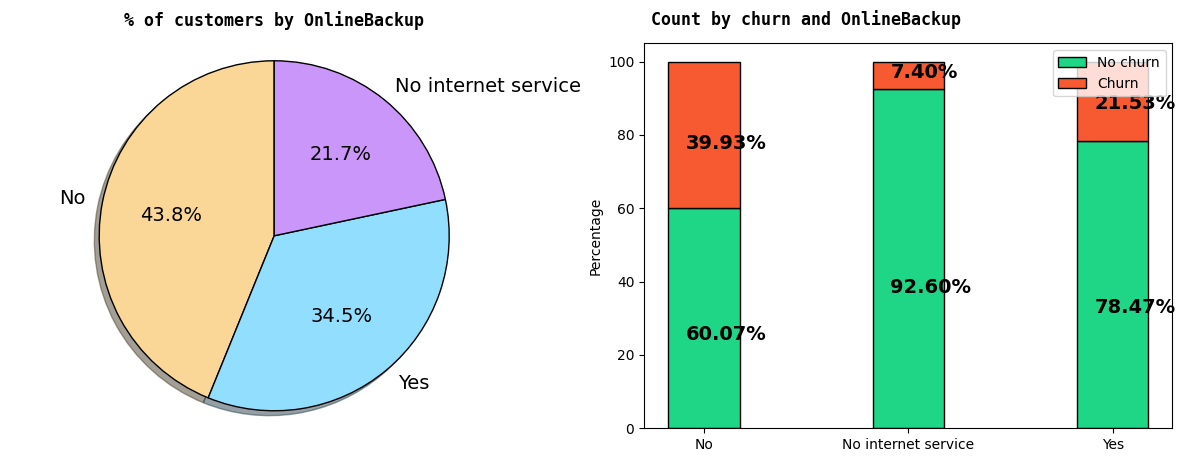

In [32]:
pie_bar("OnlineBackup")
dataset['OnlineBackup'].replace(to_replace='No internet service', value='No', inplace=True)

**Observations:**

**1. There are 21.7% of customers without InternetService as also figured in previous plots. 43.8% of customers did not have OnlineBackup but had InternetService while 34.5% of customers had OnlineBackup.**

**2.  As revealed in previous plot, a very high proportion of customers without InternetService (92.60%) did not retain themselves with the telecom company compared to a high proportion of customers with OnlineBackup (78.47%) and a low proportion of customers without OnlineBackup but with InternetService (60.07%).**

**3. 'No internet service' can be assumed as a subset of 'No' and hence merged together as both mean having No OnlineBackup.**

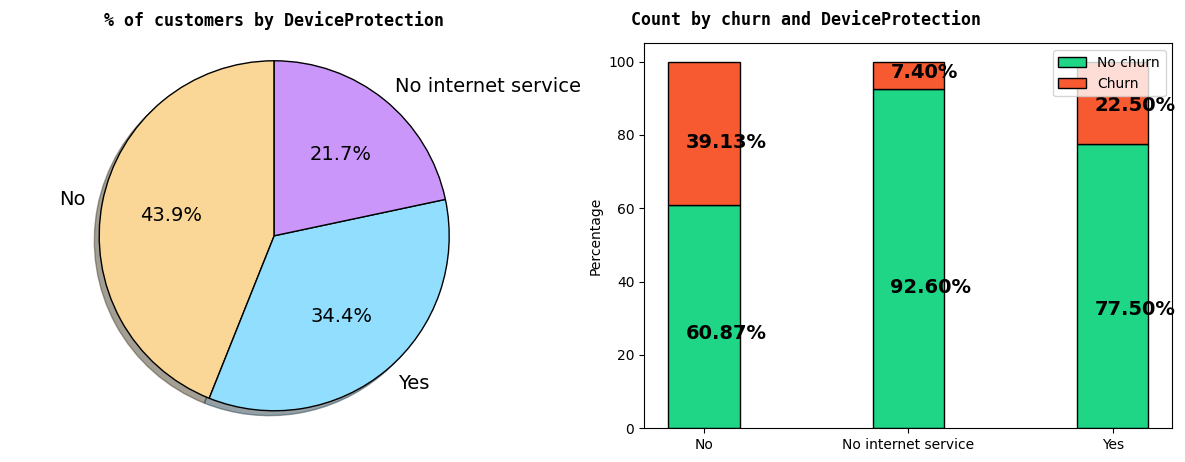

In [33]:
pie_bar("DeviceProtection")
dataset['DeviceProtection'].replace(to_replace='No internet service', value='No', inplace=True)

**Observations:**

**1. There are 21.7% of customers without InternetService as also figured in previous plots. 43.9% of customers did not have DeviceProtection but had InternetService while 34.4% of customers had DeviceProtection.**

**2.  As revealed in previous plot, a very high proportion of customers without InternetService (92.60%) did retain themselves with the telecom company compared to a high proportion of customers with DeviceProtection (77.50%) and a low proportion of customers without DeviceProtection but with InternetService (60.87%).**

**3. 'No internet service' can be assumed as a subset of 'No' and hence merged together as both mean having No DeviceProtection.**

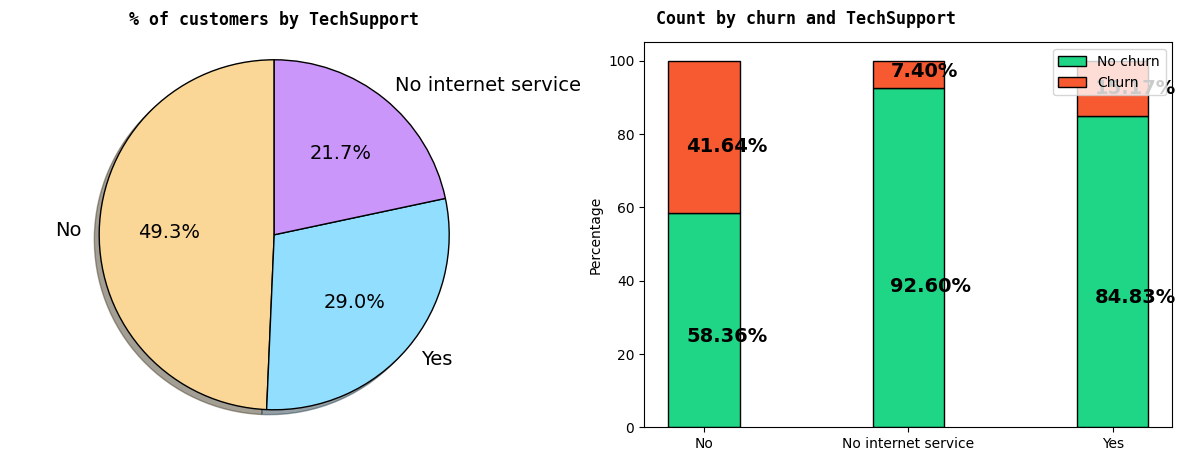

In [34]:
pie_bar("TechSupport")
dataset['TechSupport'].replace(to_replace='No internet service', value='No', inplace=True)

**Observations:**

**1. There are 21.7% of customers without InternetService as also figured in previous plots. 49.3% of customers did not have TechSupport but had InternetService while 29.0% of customers had TechSupport.**

**2.  As revealed in previous plot, a very high proportion of customers without InternetService (92.60%) did not retain themselves with the telecom company compared to a high proportion of customers with TechSupport (84.83%) and a low proportion of customers without TechSupport but with InternetService (58.36%).**

**3. 'No internet service' can be assumed as a subset of 'No' and hence merged together as both mean having No TechSupport.**

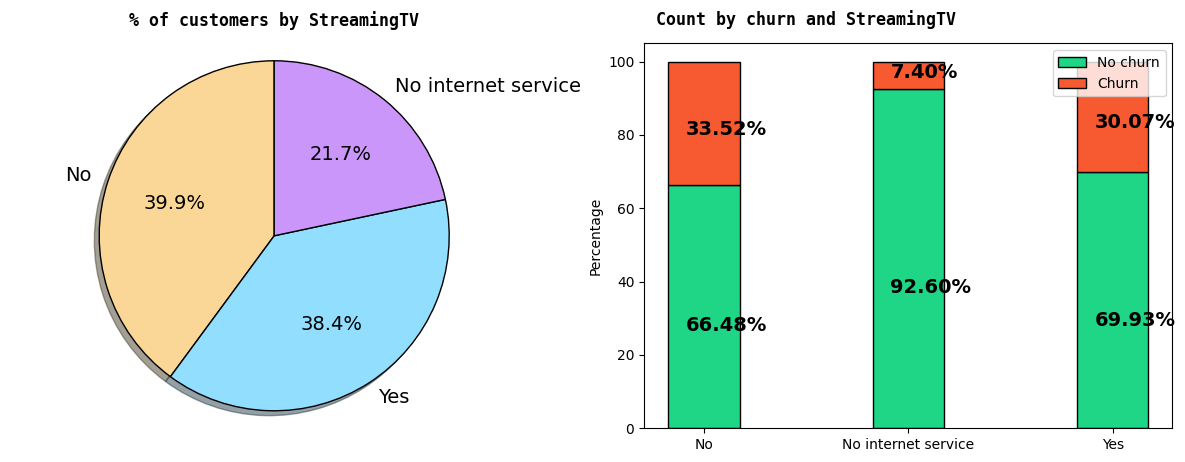

In [35]:
pie_bar("StreamingTV")
dataset['StreamingTV'].replace(to_replace='No internet service', value='No', inplace=True)

**Observations:**

**1. There are 21.7% of customers without InternetService as also figured in previous plots. 39.9% of customers did not have StreamingTV but had InternetService while 38.4% of customers had StreamingTV.**

**2.  As revealed in previous plot, a very high proportion of customers without InternetService (92.60%) did retain themselves with the telecom company compared to a moderate proportion of customers with StreamingTV (69.93%) and customers without StreamingTV but with InternetService (66.48%).**

**3. 'No internet service' can be assumed as a subset of 'No' and hence merged together as both mean having No StreamingTV.**

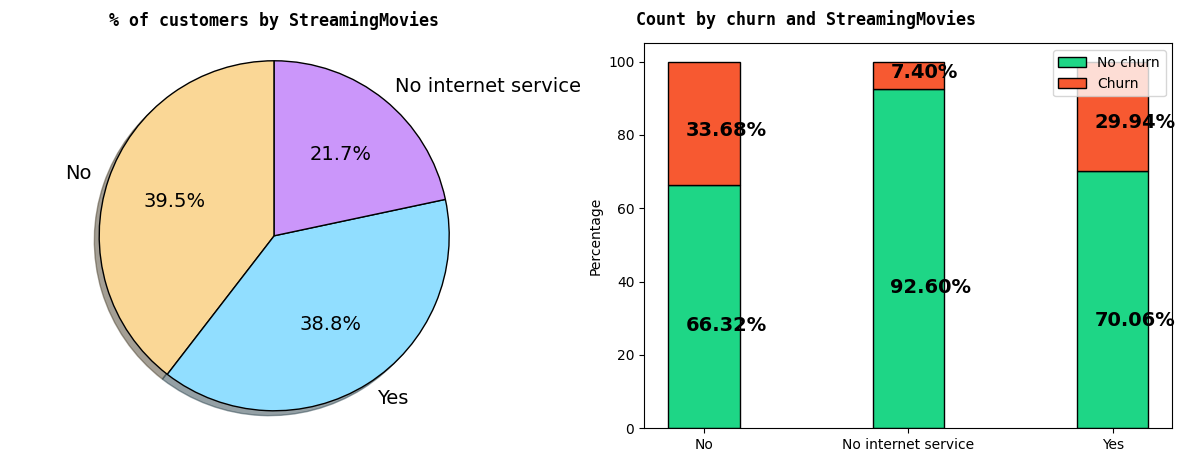

In [36]:
pie_bar("StreamingMovies")
dataset['StreamingMovies'].replace(to_replace='No internet service', value='No', inplace=True)

**Observations:**

**1. There are 21.7% of customers without InternetService as also figured in previous plots. 39.5% of customers did not have StreamingMovies but had InternetService while 38.8% of customers had StreamingMovies.**

**2.  As revealed in previous plot, a very high proportion of customers without InternetService (92.60%) did retain themselves with the telecom company compared to a moderate proportion of customers with StreamingMovies (70.06%) and customers without StreamingMovies but with InternetService (66.32%).**

**3. 'No internet service' can be assumed as a subset of 'No' and hence merged together as both mean having No StreamingMovies.**

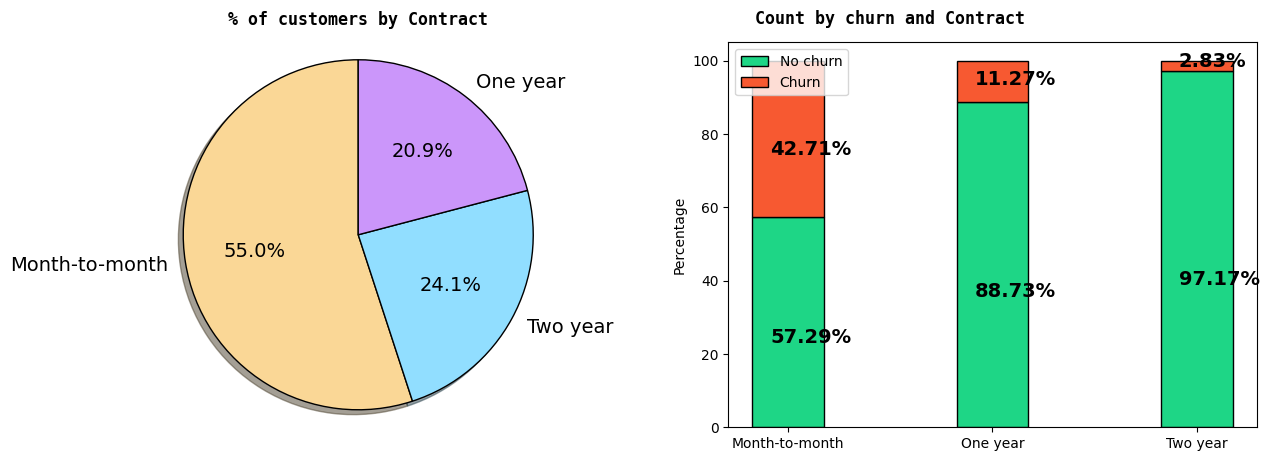

In [37]:
pie_bar("Contract")

**Observations:**

**1. There are 55.0% of customers with Month-to-Month Contract, 20.9% of customers with one year of Contract and 24.1% of customers with two years of Contract.**

**2.  An extremely high proportion of customers with Two year of Contract (97.17%) did retain themselves with the telecom company compared to the customers with One year of Contract (88.73%) and the customers with Month-to-Month Contract (57.29%).**

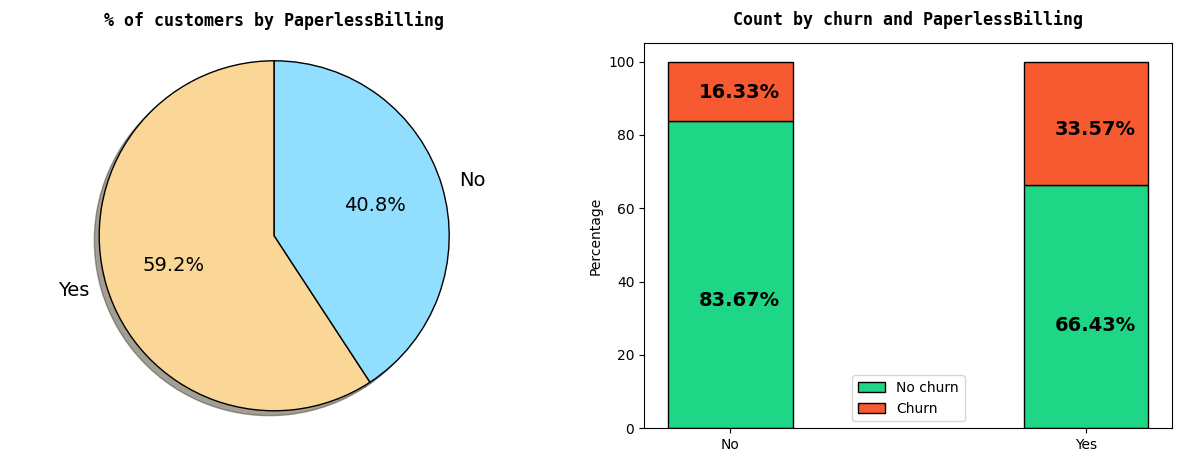

In [38]:
pie_bar("PaperlessBilling")

**Observations:**

**1. There are 59.2% of customers who go for PaperlessBilling and 40.8% of customers who did not go for Paper billing.**

**2. A high proportion of customers who did not go for paper billing (83.67%) did retain themselves with the telecom company compared to the customers who go for PaperlessBilling (66.43%).**

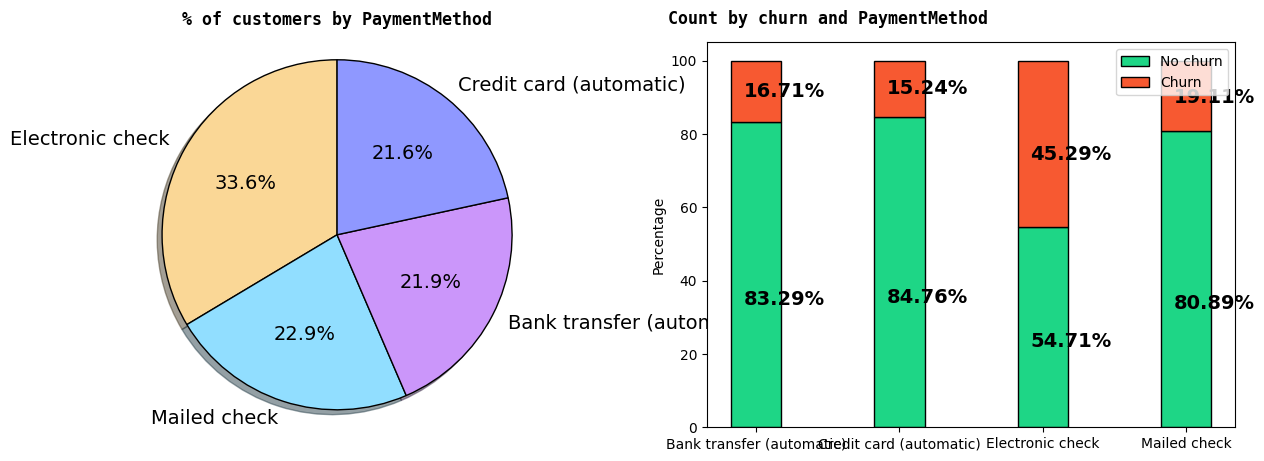

In [39]:
pie_bar("PaymentMethod")

**Observations:**

**1. There are 33.6% of customers who go for Electronic check, 22.9% of customers who go for Mailed check, 21.9% of customers who go for Bank transfer and 21.6% of customers who go for Credit card as their payment method.**

**2. An almost equally high proportion of customers who chose bank transfer(83.29%), credit card (84.76%) and mailed check (80.89%) as their PaymentMethod did retain themselves with the telecom company compared to the customers who chose Electronic check (54.71%).**

## 3.3 Analysis of the independent continuous variables

Here we will analyse the 3 independent continuous variables namely-
- tenure
- MonthlyCharges
- TotalCharges

Text(0.5, 0.98, 'Box plots for numerical attributes tenure, MonthlyCharges and TotalCharges')

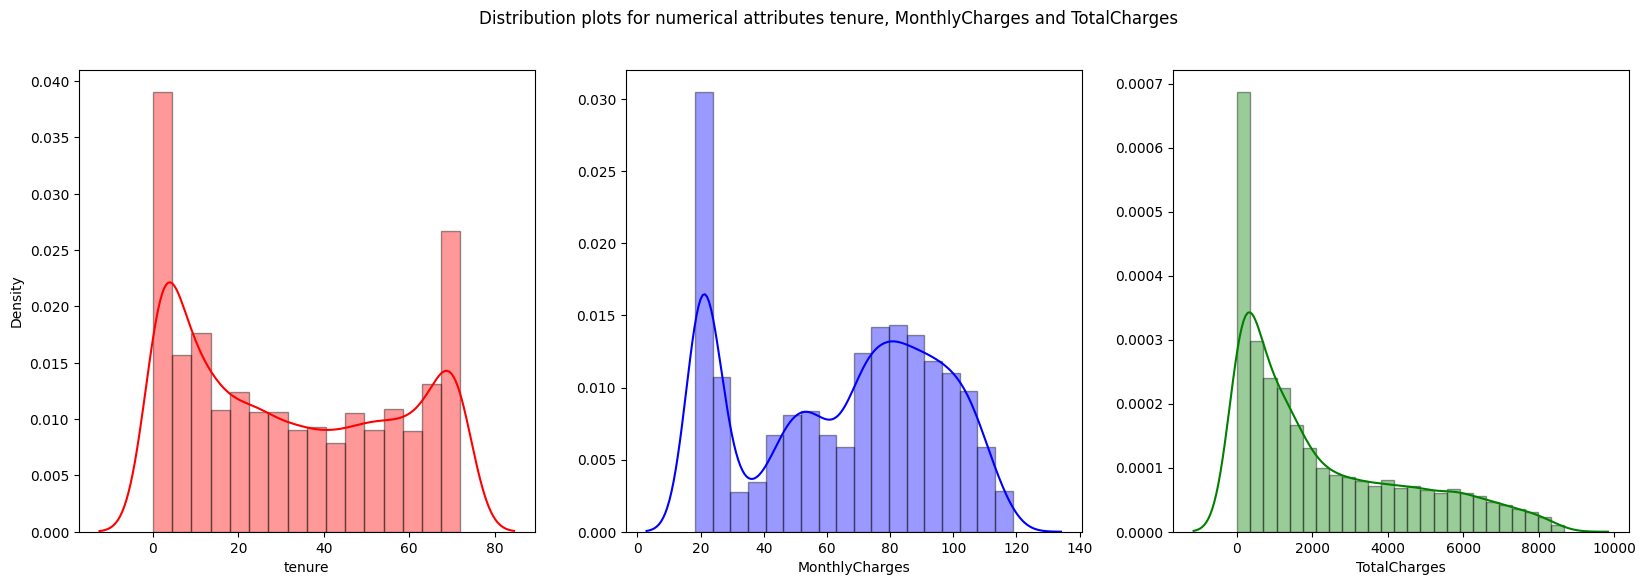

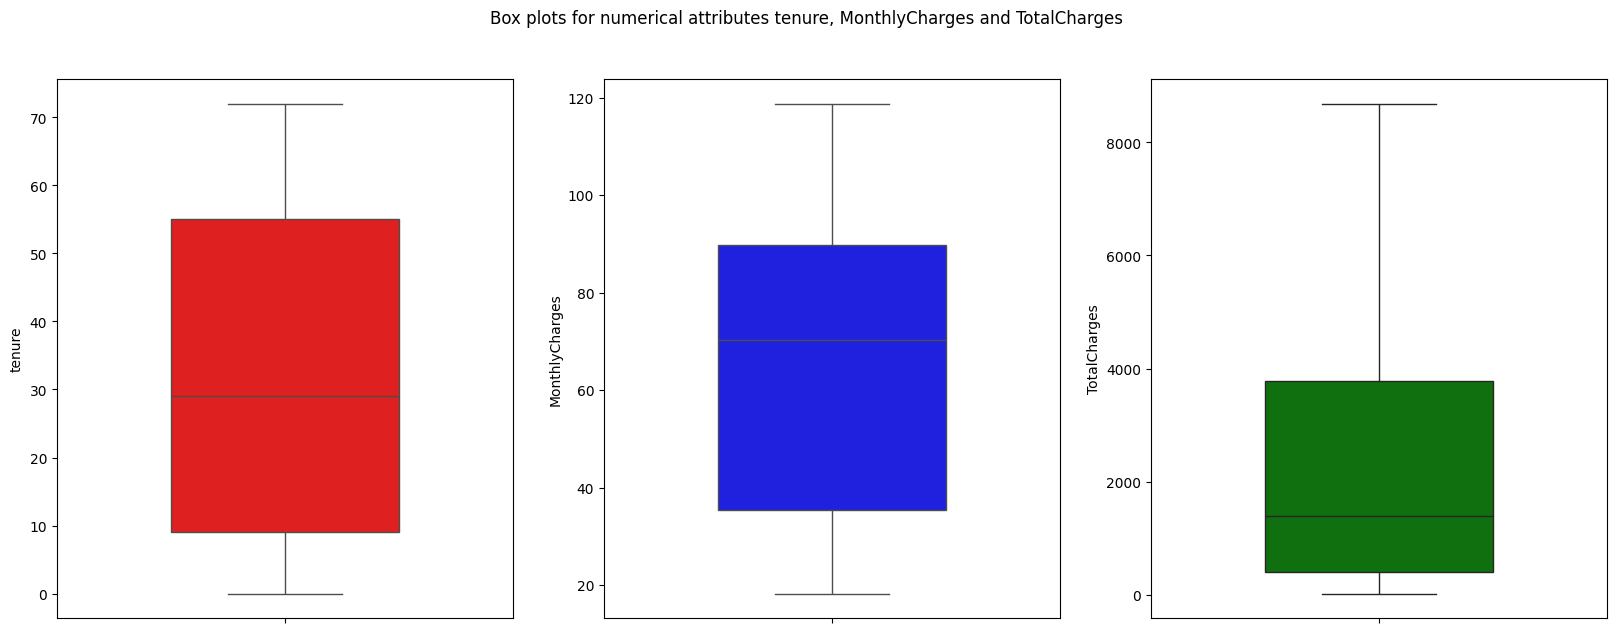

In [40]:
plt.figure(figsize=(20,6))
plt.margins(y=0.3)
plt.subplot(1,3,1)
sns.distplot(dataset['tenure'],color='red')

plt.subplot(1,3,2)
sns.distplot(dataset['MonthlyCharges'],color='blue').set(ylabel=None)

plt.subplot(1,3,3)
sns.distplot(dataset['TotalCharges'],color = 'green').set(ylabel=None)

plt.suptitle("Distribution plots for numerical attributes tenure, MonthlyCharges and TotalCharges")

plt.figure(figsize=(20,7))
plt.subplot(1,3,1)
sns.boxplot(y=dataset['tenure'],color='red',width = 0.5)

plt.subplot(1,3,2)
sns.boxplot(y=dataset['MonthlyCharges'],color='blue', width = 0.5)

plt.subplot(1,3,3)
sns.boxplot(y=dataset['TotalCharges'],color = 'green', width = 0.5)

plt.suptitle("Box plots for numerical attributes tenure, MonthlyCharges and TotalCharges")



**Observations:**

**1. The attributes tenure, MonthlyCharges and TotalCharges do not follow any particular distribution. The attribute TotalCharges is right skewed.**

**2. Seem like most of churn customer stayed in company for less than 20 months (assuming tenure attribute has units months) and customer with high value in tenure has low probability to churn.**

**3. There are no outliers. The median value of the attribute tenure is 30 with most of the data lying betwen 55 to 10. The median value of the attribute MonthlyCharges is 70 with most of the data lying between 90 and 40.**

**4. The attribute TotalCharges has values crossing 8000 while most of the data lies below 4000.**

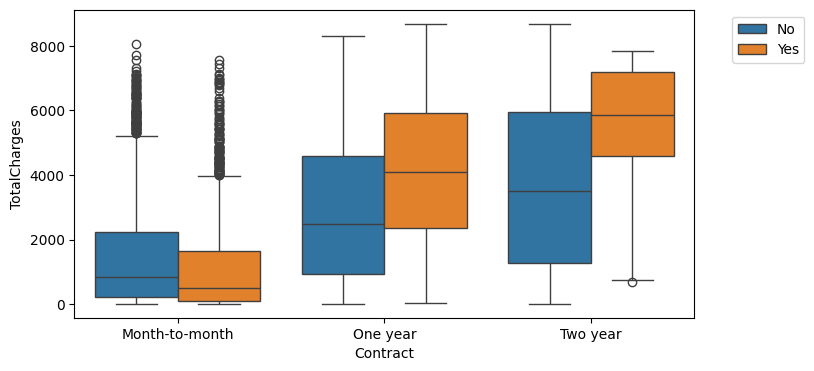

In [41]:
plt.figure(figsize = (8, 4), dpi = 100)
sns.boxplot(data = dataset, x = "Contract", y = "TotalCharges", hue = "Churn")
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

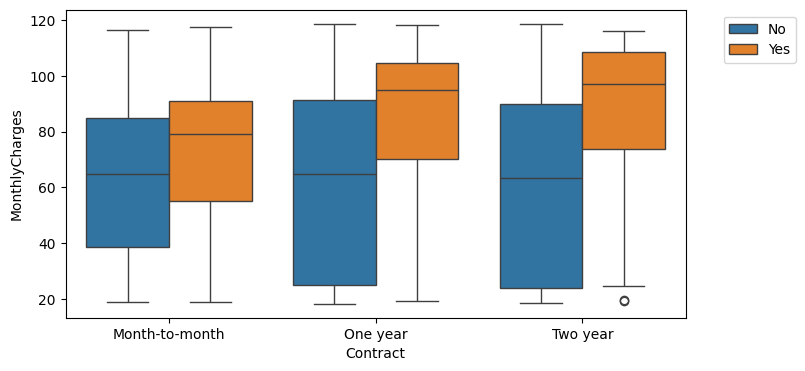

In [42]:
#The distribution of MonthlyCharges per Contract type
plt.figure(figsize = (8, 4), dpi = 100)
sns.boxplot(data = dataset, x = "Contract", y = "MonthlyCharges", hue = "Churn")
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

**bold text**# Part 2 continued

In [44]:
dataset.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,No,Yes,No,1,No,No,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,Male,No,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,Male,No,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,Male,No,No,No,45,No,No,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,Female,No,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


## 3.4 Convert categorical attributes to continuous

In [51]:
# selecting binary columns
cols_yes_no = list()
num_cols = ['tenure','MonthlyCharges','TotalCharges']

for i in dataset.columns:
    if dataset[i].nunique()==2:
        cols_yes_no.append(i)

cols_yes_no.remove('gender')    # gender has 2 values but not Yes/No. It is male/female. hence removed.
data_subset1 = dataset[cols_yes_no].copy()
data_subset2 = dataset.drop(columns=cols_yes_no)

#creating dummies (one-hot encoding for attributes other than binary) for attributes gender, InternetService, Contract PaymentMethod
data_subset2 = pd.get_dummies(data_subset2, drop_first=True)
data_subset2 = data_subset2.astype(int)
data_subset2.head()

,tenure,MonthlyCharges,TotalCharges,gender_Male,InternetService_Fiber optic,InternetService_No,Contract_One year,Contract_Two year,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,1,29,29,0,0,0,0,0,0,1,0
1,34,56,1889,1,0,0,1,0,0,0,1
2,2,53,108,1,0,0,0,0,0,0,1
3,45,42,1840,1,0,0,1,0,0,0,0
4,2,70,151,0,1,0,0,0,0,1,0


In [52]:
data_subset1 = data_subset1.replace(["Yes","No"], [1,0])
data_subset1.head()

,SeniorCitizen,Partner,Dependents,PhoneService,MultipleLines,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,PaperlessBilling,Churn
0,0,1,0,0,0,0,1,0,0,0,0,1,0
1,0,0,0,1,0,1,0,1,0,0,0,0,0
2,0,0,0,1,0,1,1,0,0,0,0,1,1
3,0,0,0,0,0,1,0,1,1,0,0,0,0
4,0,0,0,1,0,0,0,0,0,0,0,1,1


In [53]:
data_model = pd.concat([data_subset1, data_subset2], axis=1)
data_model.head()

,SeniorCitizen,Partner,Dependents,PhoneService,MultipleLines,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,PaperlessBilling,Churn,tenure,MonthlyCharges,TotalCharges,gender_Male,InternetService_Fiber optic,InternetService_No,Contract_One year,Contract_Two year,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,0,1,0,0,0,0,1,0,0,0,0,1,0,1,29,29,0,0,0,0,0,0,1,0
1,0,0,0,1,0,1,0,1,0,0,0,0,0,34,56,1889,1,0,0,1,0,0,0,1
2,0,0,0,1,0,1,1,0,0,0,0,1,1,2,53,108,1,0,0,0,0,0,0,1
3,0,0,0,0,0,1,0,1,1,0,0,0,0,45,42,1840,1,0,0,1,0,0,0,0
4,0,0,0,1,0,0,0,0,0,0,0,1,1,2,70,151,0,1,0,0,0,0,1,0


In [54]:
data_model.shape

(7043, 24)

In [ ]:
# sns.pairplot(data=data_model,hue="Churn",palette="Set1",diag_kind='hist')
# plt.suptitle("Pair Plot of Data",fontsize=20)
# plt.show()

## 3.5 Correlation between the attributes

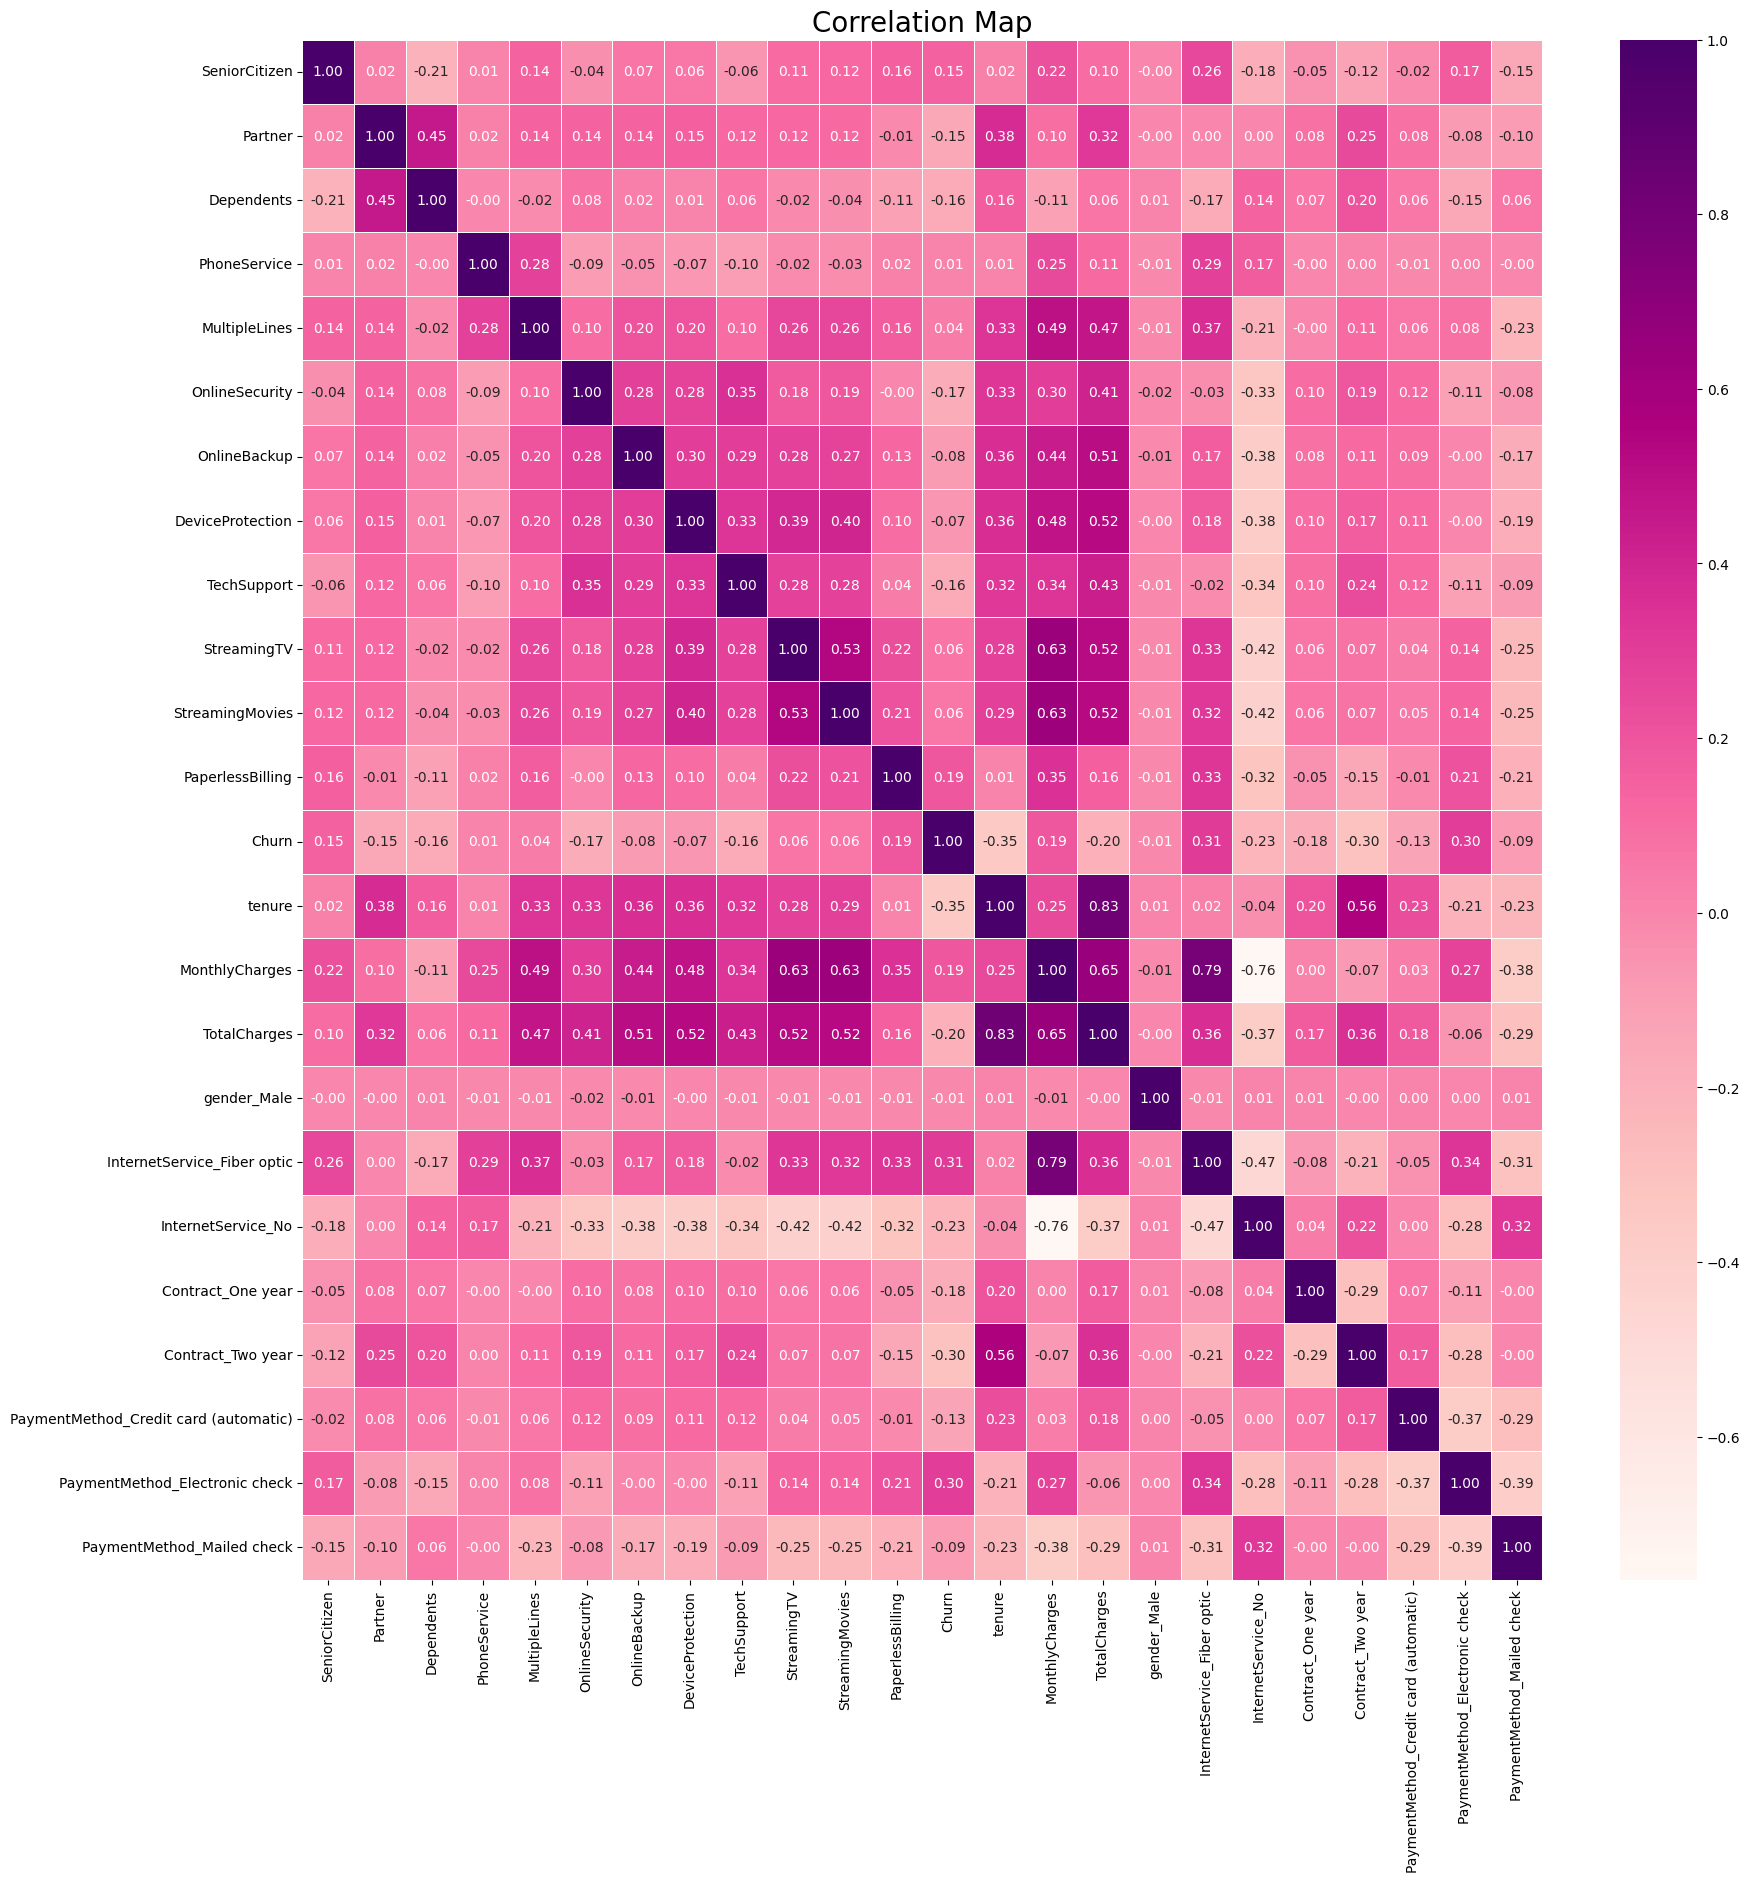

In [55]:
# correlation map

f, ax = plt.subplots(figsize=(20,20))
sns.heatmap(data_model.corr(), annot=True, linewidth=".5", cmap="RdPu", fmt=".2f", ax = ax)
plt.title("Correlation Map",fontsize=20)
plt.show()

**Observations:**

**1. The continuous attributes tenure and TotalCharges have high correlation (0.83).**

**2. MonthlyCharges and InternetService_Fiber optic have good correlation (0.79).**

**3. All other attrbiutes have very less correlation between them.**